In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Armchair

In [43]:
alpha = 0.0
beta = 2.8
a = 1.0

N = 6

# Static terms
H = np.identity(2*N, dtype = complex) * alpha


for i in range(2*N):
    for j in range(2*N):
        if j == i+1 or j == i-1:
            H[i,j] = beta      
    
# Diagonalization

k_array = np.linspace(-np.pi/a, np.pi/a, 50)
E_array = np.zeros((len(k_array), 2*N))

for idx, k in enumerate(k_array):

    counter = 0

    for i in range(2*N):
        for j in range(2*N):
            if i+j == (2*N)-1:
                counter = counter + 1
                if counter % 2 != 0:
                    H[i,j] = beta
                else:
                    if counter > N:
                        H[i,j] = beta*np.exp(+1j*k*a)
                    else:
                        H[i,j] = beta*np.exp(-1j*k*a)

    E_array[idx] = np.linalg.eigvalsh(H)

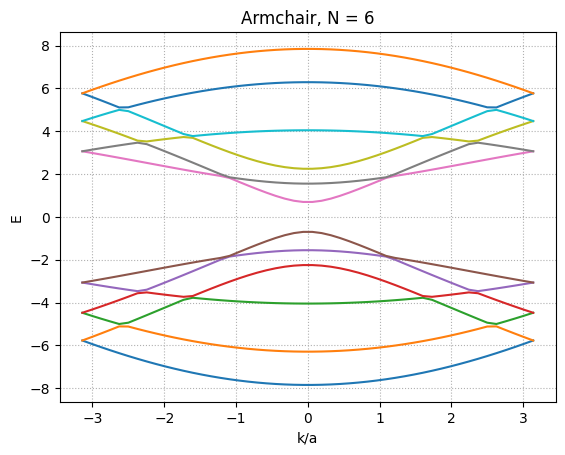

In [48]:
plt.plot(k_array/a, E_array)
plt.xlabel('k/a')
plt.ylabel('E')
plt.title(f'Armchair, N = {N}')
plt.grid(ls=':')
plt.show()

# Zigzag